
# Numpy.random

## Explain the overall purpose of the package.

**NumPy** is a core package of the Python-based ecosystem of open-source software **SciPy**. NumPy is a library that enables users to work efficiently with arrays by providing handy features to define arrays and in-built fast math functions that operate on the array. *[1]* In this notebook, we will have a closer look at the **numpy.random** package of NumPy, which allows users to generate pseudorandom numbers.

Random numbers play an important role in computer science. They are needed for simulations and useful for testing applications. Imagine wanting to develop a game - how is the program going to determine the roll of the dice or how to shuffle cards? 

It has to be kept in mind that despite its name, numpy.random cannot generate truly random numbers, but pseudorandom numbers. Ronald T. Kneusel reminds the reader that John von Neumann had already established that "there is no such thing as a random number - there are only methods to produce random numbers" *[2, p.12]* and offers a definition: 

> A pseudorandom sequence is a deterministically generated sequence of numbers that is indistinguishable from a true random sequence of numbers *[2, p.11]*

The official documentation [official documentation of numpy.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) outlines the different commands, what they do and how to use them. For the purpose of this assignment, I will provide illustrations of these commands.

Resources:


    [1]https://wiki.python.org/moin/NumPy
    [2] Random Numbers and Computers, von Ronald T. Kneusel, Springer, 2018

## 2. Explain the use of the “Simple random data” and “Permutations” functions.

As can be seen in the official documentation, numpy.random offers several ways to generate "simple random data" as well as "permutatiions". 
"Simple random data" allows the user to generate random values, samples, floats etc. whereas "permutations" offers ways in which to randomly change the sequence.

These functions work as follows

In [38]:
import numpy as np
#imported numpy
x = np.random.randint(1,10,9)
#requested numpy.random to return an array of 9 random integers from 1 (inclusive) to 10 (exclusive) and store it in x
print(x)
#show the created array

[7 4 2 4 3 4 1 9 5]


Above it can be seen that randint has returned an array of 8 randomly picked numbers as requested. "Simple random data" commands are useful to create data, where there is none. Next, let's have a look at an example of a permutation:

In [39]:
import numpy as np
#imported numpy
np.random.permutation(x)
#requested to have the above array x permuted randomly

array([1, 5, 4, 4, 2, 7, 9, 3, 4])

It can be seen that numpy.random has picked the array defined above and permuted the order.

## 3. Explain the use and purpose of at least five “Distributions” functions.

In Statistics, distributions are used to describe the probability of a certain outcome. As seen in the previous section, numpy is very efficient at generating pseudorandom data when asked. What is even more handy, is that it allows you to generate data randomly with regards to a specified distribution. 

Say you are writing a program that includes dice throws. In a fair game, you will want the probability for each number on the die to be the same - this constitutes a uniform distribution. On the other hand, you might want to simulate the results of an exam. From common knowledge, you will not expect an even distribution between all the grades, rather you would assume that the very good and very bad marks will be rare, whereas the majority of the class will fall around the middle-of-the-road marks. This would constitute a normal distribution.

The numpy.random package allows you to create pseudorandom samples by specifying the distribution type. A full list of the distributions can be found in the official documentation of numpy.random.

In the following I will illustrate how to use the distributions in numpy with illustrations:

## Normal Distribution

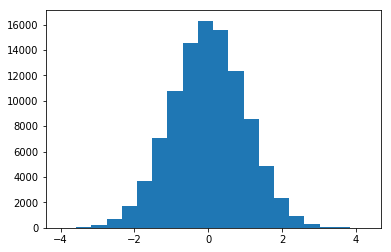

In [156]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 1
s = np.random.normal(a, b, 100000)

plt.hist(s, 20)
plt.show()


The plot above illustrates a normal distribution.

## Poisson Distribution

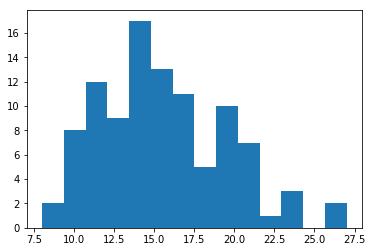

the mean of this distribution is: 15.56
the variance of this distribution is: 15.086400000000001


In [127]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.poisson(15, 100)
plt.hist(s, 14)
plt.show()

print("the mean of this distribution is:", np.mean(s))
print("the variance of this distribution is:", np.var(s))

"Poisson Distribution is applicable in situations where events occur at random points of time and space wherein our interest lies only in the number of occurrences of the event." [1]

1. Any successful event should not influence the outcome of another successful event.
2. The probability of success over a short interval must equal the probability of success over a longer interval.
3. The probability of success in an interval approaches zero as the interval becomes smaller."

Examples for this could be the number of calls in a callcenter within an hour, the number of babies born or customers to a restaurant.

The function needs the following arguments: poisson([lam, size]). lam stands for lambda. The lambbda is the average number of events in an interval [2 - wikipedia] while size specifies how many samples should be drawn. With Lambda being the average number of events or rate, it is also equal to the mean and variance of the distribution [3]

It is worth noting the effect a larger sample size has on the random distribution compared to the one above:

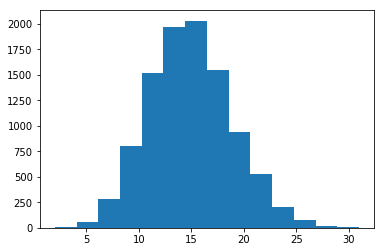

the mean of this distribution is: 14.9952
the variance of this distribution is: 14.57717696


In [145]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.poisson(15, 10000)
plt.hist(s, 14)
plt.show()

print("the mean of this distribution is:", np.mean(s))
print("the variance of this distribution is:", np.var(s))

[]1 https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
[2]
[3] https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/poisson-distribution/

### Exponential distribution

While the Poisson distribution is applicable for random events within a certain interval of time, such as babies born within a day, an exponential distribution is applicable for the time between 2 events. The randomly generated data around this distribution can f.ex. be useful to simulate failure rates.

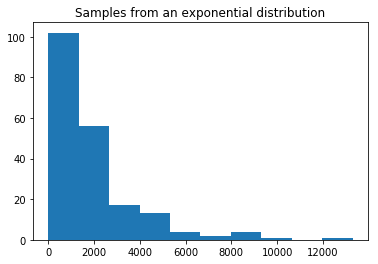

In [157]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.exponential(2000, 200)
y = np.random.exponential(200)
plt.hist(s)
plt.title('Samples from an exponential distribution')
plt.show()

Let's assume 24 babies are born in a hospital within the hour. Knowing that 24 babies are born within a day, your gut feeling might tell you it is unlikely that another baby is born within the minute and you would be throughly surprised if no other baby was born within the next four hours. This distribution of probabilities can be described using an exponential distribution. If you are looking to simulate an event in a game, such as the birth of a new tribe member, you might turn to the numpy.random.exponential function to generate the time of the happening. 

our random sample time for the baby is: 122.20937466135194


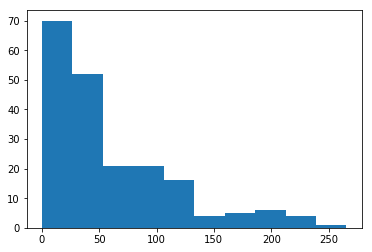

the mean of these 200 samples is: 59.46225149126842


In [54]:
import random
import numpy as np
import matplotlib.pyplot as plt

baby_born = np.random.exponential(60) # for minutes
print("our random sample time for the baby is:", baby_born)

b = [np.random.exponential(60) for i in range(200)]
plt.hist(b)
plt.show()
mean = np.mean(b)
# to prove the function is 
print("the mean of these 200 samples is:", mean)